## LDA模型

作者：伊日敏（武汉大学）

### LDA原理

我们可以将理解LDA的过程分为三个部分：核心思想、生成过程（思想实验）和推断过程（现实任务）。

---

##### 1. 核心思想：两个基本假设
LDA模型建立在两个非常直观且强大的假设之上，这是理解一切的基石：

1. **文档是主题的混合体 (Documents are mixtures of topics)**

    一篇文档的内容不是单一的，而是由多个潜在的主题以不同的比例构成的。例如，一篇关于苹果公司发布AI芯片的新闻，它可能包含了 70%的“科技”主题、20%的“商业”主题 和 10%的“国际关系”主题。

2. **主题是词语的概率分布 (Topics are distributions of words)**

    每个主题都由一系列词语来定义，其中一些词语出现的概率更高，更能代表该主题。

        例如：
            “科技”主题：由“人工智能”、“算法”、“数据”、“芯片”等词高概率构成。
            “商业”主题：由“市场”、“股票”、“财报”、“投资”等词高概率构成。

LDA的目标，就是从一堆未标记的文档中，自动地、同时地学习出这两个核心部分：每个文档的“主题配比”和每个主题的“词语构成”。

---

##### 2. 生成过程：一个思想实验
为了实现上述目标，LDA首先做了一个思想实验：如果我是神，拥有了主题和词语的全部信息，我该如何“创造”一篇文档？ 这个虚构的创造过程被称为“生成过程”(Generative Process)。

过程如下：

1. 准备工作：
    假设宇宙中已经存在 K 个主题（例如“科技”、“商业”、“体育”...）。
    每个主题都对应一个装满了无数词语的“魔法袋”，袋中每个词语的比例是固定的（这就是“主题-词语”分布 ϕ）。

2. 开始写一篇新文档：

    **第1步：确定文档的“基因”。**

    为这篇新文档随机调配一个“主题配比”（例如，70%科技, 20%商业, 10%体育）。这个独一无二的配比就是这篇文档的“文档-主题”分布θ。在数学上，这个“调配”的动作由狄利克雷分布 (Dirichlet Distribution)完成，它非常擅长生成这类总和为1的比例。

    **第2步：逐词写入文档。**
    
    要写文档里的第一个词时：

    a. 根据文档的“主题配比”（70/20/10），随机选择一个主题。比如这次抽中了“科技”。

    b. 然后，从“科技”主题的“魔法袋”中，根据词语的概率分布，随机抽一个词出来，比如抽中了“芯片”。把“芯片”写进文档。

    要写第二个词时，重复(a)和(b)：
    
    a. 再次根据70/20/10的配比，随机选一个主题。这次可能抽中了“商业”。
    
    b. 然后，从“商业”主题的魔法袋中抽一个词，比如“市场”。把“市场”写进文档。

    **第3步：不断重复。**
    
    不断重复第2步，直到文档达到预定的长度。最终，这篇文档里就会充满像“芯片”、“市场”、“算法”、“投资”等词语。

请注意：在这个过程中，**词语的顺序是无关紧要的**，只有词语本身和它的数量重要。这就是**LDA基于词袋模型 (Bag-of-Words)** 假设的原因。

---


##### 3. 推断过程：现实中的逆向工程
思想实验结束。回到现实，我们是分析师，不是神。我们手上没有现成的“主题魔法袋”，也不知道每篇文档的“主题配比”。我们拥有的，仅仅是最终生成的、一篇篇杂乱无章的文档。

LDA算法的真正任务，就是扮演一个“侦探”，进行逆向工程（Inference）。

    输入：大量的文档（语料库）。

    目标：反向推断出隐藏在背后的两个关键信息：

        全局的“主题-词语”分布 (ϕ)：推断出总共有哪些主题，以及每个主题分别由哪些词语以何种概率构成。

        每个文档的“文档-主题”分布 (θ)：推断出每一篇文档具体是由这些主题以怎样的比例混合而成的。

**“侦探”是如何工作的？**

它通过一个迭代优化的过程来寻找答案。以**吉布斯采样 (Gibbs Sampling)**为例，你可以想象它这样做：

1. 初始猜测：它首先随机地给语料库里每一个词都指派一个主题（这个初始状态是完全混乱的）。

2. 迭代修正：然后，它开始逐个地检查每一个词，并根据一个聪明的规则来更新这个词的主题归属。这个规则是：

    一个词的新主题，应该倾向于是 (1) 在这篇文档里已经很常见的主题，并且 (2) 在全局上很喜欢这个词的主题。

3. 趋于稳定：算法不断地、成千上万次地重复第2步。神奇的是，经过足够多的迭代，整个系统会从混乱无序的状态，逐渐收敛到一个稳定、有意义的状态。在这个稳定状态下，词语的主题分配不再发生大的变化。

这个最终的稳定状态，就是LDA算法给出的答案——它成功地推断出了最有可能产生我们所见文档的那些潜在主题和它们的分布。

---

##### 总结

所以，LDA的原理可以概括为：

    它基于“文档是主题混合，主题是词语分布”的假设。

    它通过一个“生成文档”的思想实验，构建了一个概率模型。

    它的核心算法是一个“逆向工程”，通过迭代计算，从已有的文本中反推出最可能的潜在主题结构。

“Latent Dirichlet Allocation”这个名字也由此而来：Latent（潜在的，因为主题是隐藏的），Dirichlet（狄利克雷，因为它是生成“混合比例”的数学工具），Allocation（分配，因为过程涉及到为词语分配主题）。

### LDA评价与调参

除了基础的实现，一个完整的LDA项目通常还包含以下几个至关重要的内容：

1. **模型评估 (Model Evaluation)**：我的模型效果好吗？

2. **超参数调优 (Hyperparameter Tuning)**：如何找到最佳的模型配置？

3. **结果可视化 (Visualization)**：如何直观地展示和探索主题？

---

#### 模型评估：困惑度 vs. 主题一致性
我们不能只凭感觉来判断模型的好坏，需要量化的指标。

a) 困惑度 (Perplexity)

    直观理解：

        困惑度衡量的是模型对于未见过的新数据的“困惑”程度或者说“惊讶”程度。一个好的模型，在学习了大量文档后，应该能很好地预测新文档中会出现哪些词。
    
        如果模型对新文档感到“不困惑”（即预测得很好），那么它的困惑度就低。
    
        所以，困惑度是越低越好。

    数学本质：
    
        它在数学上是测试集对数似然（log-likelihood）的几何平均值的倒数。简单来说，它与模型预测每个词的概率相关。如果模型赋予测试集中实际出现的词语的概率越高，那么困惑度就越低。

一个重要的“但是”：
在主题模型领域，研究者发现，困惑度最低的模型，其主题对人类来说往往并不好理解。有时，一个困惑度很低的模型产生的主题可能是由一些语法上相关但语义上不相关的词语构成的。

new_corpus 应该是一个你没有用来训练的测试集

perplexity = lda_model.log_perplexity(new_corpus)

print(f"Perplexity: {perplexity}")

b) 主题一致性 (Topic Coherence) - 【更推荐的指标】

    直观理解：

        这个指标被设计出来，就是为了更好地模拟人类对主题质量的判断。它衡量的是一个主题内部的词语在语义上有多么“一致”或“相关”。

        例如，一个主题如果是 ['猫', '狗', '宠物', '喂养']，它的“一致性”就很高。而一个主题如果是 ['猫', '汽车', '法律', '太空']，那它的一致性就很低，因为它看起来毫无逻辑。

        所以，主题一致性是越高越好。

    工作原理（简化版）：

        它通过计算一个主题内排名靠前的那些词语（比如Top 10的词），在原始文档中共同出现的频率来打分。如果这些词经常在同一篇文档里一起出现，那么这个主题就被认为是“一致的”。



#### 超参数调优：寻找最佳主题数 K

在前面的例子中，我们都是凭感觉预设了num_topics（即K值）。但在真实项目中，找到“最优”的主题数是一个核心任务。

最佳实践：结合主题一致性来寻找最优K值。

    思路：

        1. 设定一个K值的范围（例如，从2到20）。

        2. 循环遍历这个范围，针对每一个K值都训练一个LDA模型。

        3. 计算每个训练好的模型的主题一致性得分。

        4. 将K值与对应的一致性得分画成折线图。

        5. 得分最高的那个K值，通常就是我们寻找的最佳主题数。

### LDA的Python实现

In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet

In [38]:
# 更长、更真实的英文示例文本
documents = [
    # 文档1: 机器学习
    "Machine learning is a subfield of artificial intelligence. At its core, it is the practice of using algorithms to parse data, learn from it, and then make a determination or prediction about something in the world. Rather than hand-coding software routines with a specific set of instructions to accomplish a particular task, the machine is 'trained' using large amounts of data and algorithms that give it the ability to learn how to perform the task. Models are trained over many iterations, and the performance is evaluated on a separate test dataset.",
    
    # 文档2: 太空探索
    "Space exploration is the use of astronomy and space technology to explore outer space. The study of space is carried out mainly by astronomers with telescopes, and physical exploration of space is conducted both by unmanned robotic space probes and human spaceflight. The James Webb Space Telescope has recently provided stunning new images of distant galaxies and nebulae, offering insights into the early universe. Meanwhile, rovers on Mars continue to search for signs of past life and analyze the planet's geology.",
    
    # 文档3: 气候变化
    "Climate change refers to long-term shifts in temperatures and weather patterns. These shifts may be natural, but since the 1800s, human activities have been the main driver of climate change, primarily due to the burning of fossil fuels like coal, oil and gas. This process produces greenhouse gas emissions that act like a blanket wrapped around the Earth, trapping the sun's heat and raising temperatures. Addressing climate change involves reducing emissions through a transition to renewable energy sources like solar and wind power, and improving energy efficiency.",
    
    # 我们再增加几个混合主题的文档来增加挑战
    # 文档4: 机器学习在气候模型中的应用
    "Advanced machine learning models are now being used to improve climate change predictions. By analyzing vast datasets from satellites and weather stations, these AI algorithms can identify complex patterns in the Earth's climate system that are difficult for traditional models to capture. This allows for more accurate forecasts of temperature shifts and extreme weather events.",
    
    # 文档5: 太空技术与可再生能源
    "Technology originally developed for space exploration has found novel applications in the renewable energy sector. For instance, high-efficiency solar panels designed for satellites are inspiring improvements in terrestrial solar power generation. The study of planetary atmospheres also helps scientists model Earth's own climate dynamics with greater precision."
]

In [39]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# 获取英文停用词列表
stop_words = set(stopwords.words('english'))
# 初始化词形还原器
lemmatizer = WordNetLemmatizer()

def preprocess_english_text(text):
    # 1. 转为小写，并移除标点符号
    text = re.sub(r'[^\w\s]', '', text.lower())
    
    # 2. 分词
    words = text.split()
    
    # 3. 移除停用词并进行词形还原
    processed_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and len(word) > 2]
    
    return processed_words

# 对所有文档进行预处理
processed_docs = [preprocess_english_text(doc) for doc in documents]

print("预处理后的文档示例 (第一篇):")
print(processed_docs[0])

预处理后的文档示例 (第一篇):
['machine', 'learning', 'subfield', 'artificial', 'intelligence', 'core', 'practice', 'using', 'algorithm', 'parse', 'data', 'learn', 'make', 'determination', 'prediction', 'something', 'world', 'rather', 'handcoding', 'software', 'routine', 'specific', 'set', 'instruction', 'accomplish', 'particular', 'task', 'machine', 'trained', 'using', 'large', 'amount', 'data', 'algorithm', 'give', 'ability', 'learn', 'perform', 'task', 'model', 'trained', 'many', 'iteration', 'performance', 'evaluated', 'separate', 'test', 'dataset']


In [40]:
from gensim import corpora, models

# 3. 创建词典和语料库
dictionary = corpora.Dictionary(processed_docs)
# 过滤掉出现次数极少或极多的词（可选，但推荐）
dictionary.filter_extremes(no_below=2, no_above=0.8)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]


# 4. 训练LDA模型
# 因为我们准备了3个核心主题的数据，所以设置num_topics=3
num_topics = 3

lda_model = models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    passes=20,
    random_state=100
)

In [41]:
print("\nLDA模型发现的主题:")
topics = lda_model.print_topics(num_words=6)
for topic in topics:
    print(topic)


LDA模型发现的主题:
(0, '0.360*"space" + 0.141*"exploration" + 0.094*"study" + 0.094*"technology" + 0.058*"human" + 0.016*"model"')
(1, '0.140*"climate" + 0.097*"change" + 0.075*"energy" + 0.074*"solar" + 0.074*"temperature" + 0.074*"shift"')
(2, '0.155*"algorithm" + 0.155*"machine" + 0.134*"model" + 0.108*"learning" + 0.108*"prediction" + 0.061*"weather"')


In [42]:
# 文档4是关于机器学习在气候模型中的应用
doc_to_check_bow = corpus[3] 

doc_lda_topics = lda_model.get_document_topics(doc_to_check_bow)

print(f"\n文档4 (机器学习与气候模型) 的主题分布:")
print(doc_lda_topics)


文档4 (机器学习与气候模型) 的主题分布:
[(0, 0.019740025), (1, 0.571131), (2, 0.409129)]


Number of Topics = 2, Perplexity = 2714.1233
Number of Topics = 4, Perplexity = 85049.5074
Number of Topics = 6, Perplexity = 1166151.0108
Number of Topics = 8, Perplexity = 5118844.5555
Number of Topics = 10, Perplexity = 17276335.4317
Number of Topics = 12, Perplexity = 48988540.5733
Number of Topics = 14, Perplexity = 122360233.4659
Number of Topics = 16, Perplexity = 276396327.7361
Number of Topics = 18, Perplexity = 578399399.9333
Number of Topics = 20, Perplexity = 1134929676.8954


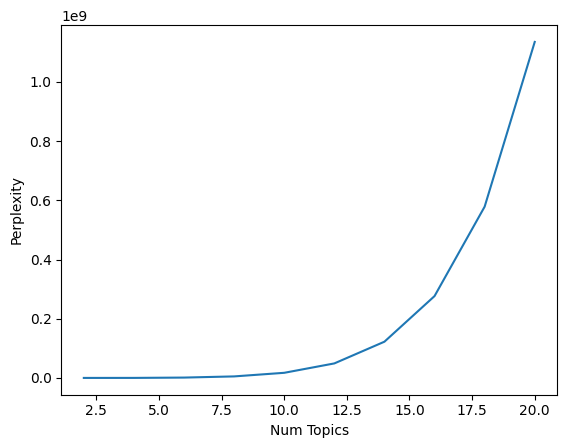

In [ ]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import numpy as np

# 1. 分割數據
# 假設我們有1000篇文檔，用800篇訓練，200篇測試
split_point = int(len(processed_docs) * 0.8)
train_texts = processed_docs[:split_point]
test_texts = processed_docs[split_point:]

# 僅用訓練數據創建詞典和語料庫
train_dictionary = Dictionary(train_texts)
train_corpus = [train_dictionary.doc2bow(text) for text in train_texts]

# 用相同的詞典轉換測試數據
test_corpus = [train_dictionary.doc2bow(text) for text in test_texts]


# 2. 循環訓練與評估
perplexity_values = []
model_list = []
k_range = range(2, 21, 2) # 測試K從2到20，步長為2

for num_topics in k_range:
    # 僅在訓練集上訓練
    lda_model = LdaModel(corpus=train_corpus,
                         id2word=train_dictionary,
                         num_topics=num_topics,
                         passes=15,
                         random_state=42)
    model_list.append(lda_model)
    
    # 在測試集上計算困惑度
    # log_perplexity返回值是log2(perplexity)，所以值越大（越接近0）越好
    # Perplexity本身是 exp(-log_perplexity)，越小越好
    log_perplexity = lda_model.log_perplexity(test_corpus)
    perplexity = np.exp2(-log_perplexity)
    perplexity_values.append(perplexity)
    
    print(f"Number of Topics = {num_topics}, Perplexity = {perplexity:.4f}")

# 3. 繪圖找到最低點
import matplotlib.pyplot as plt
plt.plot(k_range, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity")
plt.show()